## House Price Predicion 

kaggle dataset link:
    https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data
    
    What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

data descptn:
the price are in lakhs!!
size is the no of BKHs

In [1]:
import numpy as np
import pandas as pd
import warnings


warnings.filterwarnings('ignore')



df=pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Feature Engineering


In [4]:
df=df.rename(columns={'area_type':'Area Type'})
df['Area Type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: Area Type, dtype: int64

no null values in the Area Type

In [5]:
df['availability'].value_counts()


Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
14-Nov               1
15-Aug               1
17-Jan               1
15-Jun               1
Name: availability, Length: 81, dtype: int64

In [6]:
# use the `str` with a regular expression to replace non-alphabetic characters
df['availability'] = df['availability'].str.replace('[^a-zA-Z]', '')

df['availability'].value_counts()

ReadyToMove            10581
Dec                      728
May                      338
Apr                      298
Aug                      249
Mar                      246
Jul                      206
Jun                      200
Jan                      126
Oct                       91
Sep                       87
Nov                       79
Feb                       75
ImmediatePossession       16
Name: availability, dtype: int64

In [7]:
d=df['location'].value_counts().to_dict()

In [8]:
df['location']=df['location'].str.replace('Road','')
df['location']=df['location'].str.replace('th Phase','')
df['location']=df['location'].str.replace('1','')
df['location']=df['location'].str.replace('2','')
df['location']=df['location'].str.replace('8','')
df['location']=df['location'].str.replace('7','')
df['location']=df['location'].str.replace('9','')
df['location']=df['location'].str.replace('5','')
df['location']=df['location'].str.replace('6','')
df['location']=df['location'].str.replace('4','')
df['location']=df['location'].str.replace('3','')
df['location']=df['location'].str.replace(' ','')
df['location']=df['location'].str.replace('II','')
df['location']=df['location'].str.replace('ElectronicsCity','ElectronicCity')
df['location']=df['location'].str.replace('mainroad','')

df['location']=df['location'].str.replace('Main','')
df['location']=df['location'].str.replace('BAGUR','Begur')
df['location']=df['location'].str.replace('ROAD','')

df['location']=df['location'].str.replace('Bellandur','Marathahalli')

df['location']=df['location'].str.replace('KRPuram','Sarjapur')
df['location']=df['location'].str.replace('Hoodi','Sarjapur')
df['location']=df['location'].str.replace('ROAD','')
df['location']=df['location'].str.replace('Phase','')

In [9]:

df

,Area Type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,ElectronicCity,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,ReadyToMove,ChikkaTirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,ReadyToMove,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,ReadyToMove,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,ReadyToMove,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,ReadyToMove,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,ReadyToMove,RichardsTown,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,ReadyToMove,RajaRajeshwariNagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [10]:
d=df['location'].value_counts().to_dict()
d

{'Sarjapur': 660,
 'Whitefield': 541,
 'ElectronicCity': 525,
 'JPNagar': 387,
 'Kanakpura': 273,
 'Marathahalli': 271,
 'Thanisandra': 241,
 'Yelahanka': 213,
 'Hennur': 207,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'RajaRajeshwariNagar': 171,
 'Bannerghatta': 170,
 'Haralur': 142,
 'RajajiNagar': 107,
 'Begur': 102,
 'Chandapura': 100,
 'Yeshwanthpur': 85,
 'Varthur': 85,
 'Kasavanhalli': 81,
 'Harlur': 79,
 'Banashankari': 75,
 'RamamurthyNagar': 74,
 'Hormavu': 74,
 'Kengeri': 73,
 'Hosa': 72,
 'Koramangala': 72,
 'Jakkur': 71,
 'OldMadras': 71,
 'Kothanur': 66,
 'Kaggadasapura': 64,
 'Nagarbhavi': 63,
 'AkshayaNagar': 62,
 'Thigalarapalya': 62,
 'TCPalaya': 60,
 'Malleshwaram': 58,
 'Rachenahalli': 58,
 'Jigani': 54,
 'Budigere': 54,
 'HSRLayout': 53,
 'Jalahalli': 52,
 'Hulimavu': 52,
 'Panathur': 51,
 'Bisuvanahalli': 51,
 'Ramagondanahalli': 50,
 'Bhoganhalli': 50,
 'Mysore': 50,
 'HegdeNagar': 49,
 'Gottigere': 48,
 'Devanahalli': 47,
 'Kundalahalli': 47,
 'Brookefield': 47,
 'Ho

In [11]:
df.isnull().sum()

Area Type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
# get the top 15 most frequent values in the 'location' column
top_values = df['location'].value_counts().head(15).index.tolist()

# replace all values not in the top 15 with 'Whitefield'
df['location'][:2000] = df['location'][:2000].where(df['location'].isin(top_values), 'Whitefield')
df['location'][2000:5000] = df['location'][2000:5000].where(df['location'].isin(top_values), 'Sarjapur')

In [13]:
d=df['location'].value_counts().to_dict()
d

{'Sarjapur': 2729,
 'Whitefield': 1909,
 'ElectronicCity': 525,
 'JPNagar': 387,
 'Kanakpura': 273,
 'Marathahalli': 271,
 'Thanisandra': 241,
 'Yelahanka': 213,
 'Hennur': 207,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'RajaRajeshwariNagar': 171,
 'Bannerghatta': 170,
 'Haralur': 142,
 'RajajiNagar': 107,
 'Chandapura': 60,
 'Begur': 56,
 'Hormavu': 55,
 'Varthur': 54,
 'OldMadras': 53,
 'Yeshwanthpur': 51,
 'Banashankari': 48,
 'Kasavanhalli': 48,
 'Jakkur': 45,
 'Harlur': 45,
 'Kothanur': 44,
 'Hosa': 44,
 'Kengeri': 42,
 'Koramangala': 41,
 'Kaggadasapura': 40,
 'Nagarbhavi': 39,
 'Thigalarapalya': 39,
 'RamamurthyNagar': 39,
 'Jalahalli': 37,
 'Budigere': 36,
 'AkshayaNagar': 35,
 'Bhoganhalli': 35,
 'TCPalaya': 35,
 'Kundalahalli': 34,
 'HSRLayout': 34,
 'Malleshwaram': 34,
 'Ramagondanahalli': 33,
 'Brookefield': 33,
 'CVRamanNagar': 32,
 'Rachenahalli': 32,
 'Panathur': 32,
 'Jigani': 31,
 'Vidyaranyapura': 31,
 'HegdeNagar': 31,
 'Hosur': 31,
 'Balagere': 30,
 'YelahankaNewTown': 

In [14]:

# get the top 15 most frequent values in the 'location' column
top_values = df['location'].value_counts().head(15).index.tolist()

# replace all values not in the top n with 'Whitefield'
df['location'] = df['location'].where(df['location'].isin(top_values), 'NaN')





In [15]:
d=df['location'].value_counts().to_dict()
d

{'NaN': 5612,
 'Sarjapur': 2729,
 'Whitefield': 1909,
 'ElectronicCity': 525,
 'JPNagar': 387,
 'Kanakpura': 273,
 'Marathahalli': 271,
 'Thanisandra': 241,
 'Yelahanka': 213,
 'Hennur': 207,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'RajaRajeshwariNagar': 171,
 'Bannerghatta': 170,
 'Haralur': 142,
 'RajajiNagar': 107}

In [16]:
replacement_values = [i for i in df['location'].value_counts().index]
replacement_values

['NaN',
 'Sarjapur',
 'Whitefield',
 'ElectronicCity',
 'JPNagar',
 'Kanakpura',
 'Marathahalli',
 'Thanisandra',
 'Yelahanka',
 'Hennur',
 'Uttarahalli',
 'Hebbal',
 'RajaRajeshwariNagar',
 'Bannerghatta',
 'Haralur',
 'RajajiNagar']

In [17]:
# split the 'location' column into 15 parts
df_parts = np.array_split(df['location'],15 )

In [18]:
#replacing the Nan values with the top 15 values ... ig it works!!

for i in range(1,15):
    df_parts[i-1]=df_parts[i-1].str.replace('NaN',replacement_values[i])


In [19]:
df['locate'] = pd.DataFrame(np.concatenate(df_parts), columns=['location'])

df['locate'].value_counts()

Sarjapur               2729
Whitefield             1909
Yelahanka               832
Thanisandra             811
Hennur                  805
Uttarahalli             796
Hebbal                  778
RajaRajeshwariNagar     774
Haralur                 752
Bannerghatta            751
NaN                     593
ElectronicCity          525
Marathahalli            498
JPNagar                 387
Kanakpura               273
RajajiNagar             107
Name: locate, dtype: int64

In [20]:
# drop the location and society columns
df=df.drop('location',1)
df=df.drop('society',1)
df['locate']=df['locate'].str.replace('Nan','ElectronicCity')



In [21]:
df.isnull().sum()

Area Type         0
availability      0
size             16
total_sqft        0
bath             73
balcony         609
price             0
locate            0
dtype: int64

df['size'].fillna('2')
df['size']=df['size'].str.replace('BHK','')
df['size']=df['size'].str.replace('Bedroom','')
df['size']=df['size'].str.replace('RK','')


df['size']=df['size'].astype(float)

df['bath']=df['bath'].astype(float)
df['balcony']=df['balcony'].astype(float)            

In [22]:
df['size'].value_counts()


2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
16 BHK           1
14 BHK           1
13 BHK           1
19 BHK           1
18 Bedroom       1
12 Bedroom       1
43 Bedroom       1
27 BHK           1
Name: size, dtype: int64

In [23]:
df['size']=df['size'].str.replace('BHK','')
df['size']=df['size'].str.replace('Bedroom','')
df['size']=df['size'].str.replace('RK','')
df['size']=df['size'].fillna('2')
df['size']=df['size'].astype(float)

In [24]:
df['bath'].value_counts()
df['bath']=df['bath'].fillna('2')
df['bath']=df['bath'].astype(int)

In [25]:
df['balcony']=df['balcony'].fillna('0')
df['balcony']=df['balcony'].astype(float)

In [26]:
d=df['total_sqft'].value_counts()

In [27]:
df['total_sqft']=df['total_sqft'].apply(lambda x:x[:5])


# filter out rows with non-numeric values in total_sqft
df = df[df['total_sqft'].str.isnumeric()]

df['total_sqft']=df['total_sqft'].astype(float)


# EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12986 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Type     12986 non-null  object 
 1   availability  12986 non-null  object 
 2   size          12986 non-null  float64
 3   total_sqft    12986 non-null  float64
 4   bath          12986 non-null  int32  
 5   balcony       12986 non-null  float64
 6   price         12986 non-null  float64
 7   locate        12986 non-null  object 
dtypes: float64(4), int32(1), object(3)
memory usage: 862.4+ KB


<AxesSubplot:xlabel='Area Type', ylabel='count'>

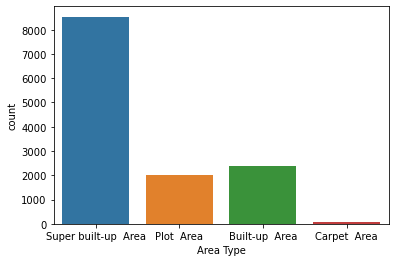

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('Area Type',data=df)

<Figure size 648x2088 with 0 Axes>

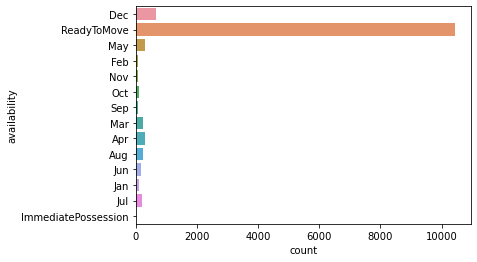

<Figure size 648x2088 with 0 Axes>

In [30]:
sns.countplot(y='availability',data=df)
plt.figure(figsize=(9,29))

<AxesSubplot:ylabel='Density'>

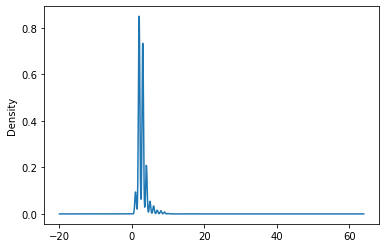

In [31]:
df['size'].plot(kind='kde')

In [32]:
print('the minimum size in BHK',df['size'].min())
print('the maximum size in BHK',df['size'].max())
print('the average size in BHK',df['size'].median(),' - ',df['size'].mean())

the minimum size in BHK 1.0
the maximum size in BHK 43.0
the average size in BHK 3.0  -  2.804173725550593


<AxesSubplot:ylabel='Density'>

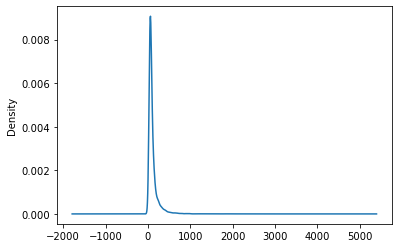

In [33]:
df['price'].plot(kind='kde')


In [34]:
print('the minimum price in lakhs',df['price'].min())
print('the maximum price in lakhs',df['price'].max())
print('the average price in lakhs',df['price'].median(),' - ',df['price'].mean())

the minimum price in lakhs 8.0
the maximum price in lakhs 3600.0
the average price in lakhs 71.525  -  112.27140458955783


<AxesSubplot:>

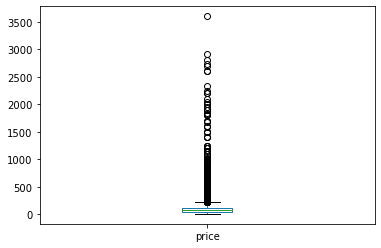

In [35]:
df['price'].plot(kind='box')

# Model Building

In [36]:
df

,Area Type,availability,size,total_sqft,bath,balcony,price,locate
0,Super built-up Area,Dec,2.0,1056.0,2,1.0,39.07,ElectronicCity
1,Plot Area,ReadyToMove,4.0,2600.0,5,3.0,120.00,Whitefield
2,Built-up Area,ReadyToMove,3.0,1440.0,2,3.0,62.00,Uttarahalli
3,Super built-up Area,ReadyToMove,3.0,1521.0,3,1.0,95.00,Whitefield
4,Super built-up Area,ReadyToMove,2.0,1200.0,2,1.0,51.00,Whitefield
...,...,...,...,...,...,...,...,...
13315,Built-up Area,ReadyToMove,5.0,3453.0,4,0.0,231.00,Whitefield
13316,Super built-up Area,ReadyToMove,4.0,3600.0,5,0.0,400.00,NaN
13317,Built-up Area,ReadyToMove,2.0,1141.0,2,1.0,60.00,RajaRajeshwariNagar
13318,Super built-up Area,Jun,4.0,4689.0,4,1.0,488.00,NaN


In [37]:
x=df.drop('price',1)
y=df['price']
# log transformation of y  \\ target
y = np.log1p(y)

In [38]:
#train and test spliting the data
from sklearn.model_selection import train_test_split as tt
x_train,x_test,y_train,y_test=tt(x,y,test_size=0.3,random_state=4)

In [39]:
x_train

,Area Type,availability,size,total_sqft,bath,balcony,locate
9779,Super built-up Area,May,2.0,1160.0,2,1.0,ElectronicCity
12620,Super built-up Area,ReadyToMove,2.0,1246.0,2,1.0,NaN
6635,Super built-up Area,Oct,3.0,1450.0,3,1.0,Bannerghatta
7701,Super built-up Area,ReadyToMove,2.0,1020.0,2,2.0,Hennur
2099,Plot Area,ReadyToMove,2.0,1350.0,2,1.0,Sarjapur
...,...,...,...,...,...,...,...
6177,Super built-up Area,ReadyToMove,2.0,1165.0,2,1.0,Thanisandra
730,Built-up Area,ReadyToMove,2.0,1202.0,2,1.0,Haralur
10957,Super built-up Area,ReadyToMove,2.0,1100.0,2,1.0,Bannerghatta
8592,Super built-up Area,ReadyToMove,4.0,7400.0,5,0.0,Uttarahalli


In [40]:
# importing all the Regressor models and try checking the the r2score close to 1

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR




In [41]:
#Linear Regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5773366443262767
MAE 0.34669055863544607


In [42]:
#Ridge Regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5797527494431091
MAE 0.3466310651721145


In [43]:
#Lasso Regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5799563962187997
MAE 0.34673009221022766


In [44]:
#DT
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7230587965894142
MAE 0.26660917364307757


In [45]:
#KNN
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6844297948886224
MAE 0.27873937044101726


In [46]:
#Gradient Boost

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7567719829059094
MAE 0.25433084907266523


In [47]:
#Adaboosting
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6506903498103511
MAE 0.31508236377777643


In [48]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [01:16<00:00,  1.86s/it]


In [49]:

print(models)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LGBMRegressor                                0.76       0.76   0.34   
HistGradientBoostingRegressor                0.76       0.76   0.34   
GradientBoostingRegressor                    0.75       0.75   0.35   
XGBRegressor                                 0.75       0.75   0.35   
RandomForestRegressor                        0.74       0.74   0.36   
BaggingRegressor                             0.72       0.72   0.37   
SVR                                          0.72       0.72   0.37   
NuSVR                                        0.72       0.72   0.37   
MLPRegressor                                 0.71       0.71   0.37   
ExtraTreesRegressor                          0.71       0.71   0.38   
KNeighborsRegressor                          0.67       0.67   0.40   
HuberRegressor                               0.66       0.66   0.41   
AdaBoo

In [51]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [52]:
x_test

,Area Type,availability,size,total_sqft,bath,balcony,locate
11382,Built-up Area,ReadyToMove,2.00,1300.00,2,3.00,Bannerghatta
7985,Plot Area,ReadyToMove,2.00,600.00,2,1.00,Hennur
7644,Super built-up Area,ReadyToMove,2.00,770.00,1,1.00,ElectronicCity
2495,Plot Area,ReadyToMove,3.00,600.00,4,3.00,Sarjapur
4754,Super built-up Area,ReadyToMove,4.00,2062.00,3,0.00,Sarjapur
...,...,...,...,...,...,...,...
6388,Built-up Area,ReadyToMove,3.00,2099.00,3,0.00,Yelahanka
8822,Plot Area,ReadyToMove,3.00,2400.00,4,1.00,Uttarahalli
7116,Super built-up Area,Oct,3.00,1610.00,2,2.00,Hennur
319,Super built-up Area,ReadyToMove,2.00,1113.00,2,1.00,Whitefield


# mlflow

In [4]:
import mlflow
import mlflow.sklearn

ModuleNotFoundError: No module named 'mlflow'

In [2]:
pip install mlflow

  Using cached mlflow-2.3.1-py3-none-any.whl (17.7 MB)
  Using cached docker-6.1.0-py3-none-any.whl (147 kB)
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached alembic-1.10.4-py3-none-any.whl (212 kB)
  Using cached pyarrow-11.0.0-cp38-cp38-win_amd64.whl (20.6 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached databricks_cli-0.17.6-py3-none-any.whl
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached PyJWT-2.6.0-py3-none-any.whl (20 kB)
  Using cached pywin32-306-cp38-cp38-win_amd64.whl (9.4 MB)
  Using cached requests-2.30.0-py3-none-any.whl (62 kB)
  Using cached websocket_client

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\deepa\\anaconda3\\Lib\\site-packages\\pywin32_system32\\pywintypes38.dll'
Consider using the `--user` option or check the permissions.

